# What is biggest reason that affect price of car

## Fall 2024 Data Science Project

**By Zhiming Lin**

**Introduction**

the question that I interestedis what is reasons that affect price of car. there are many reason, but I think the biggest reason that affect the car price is age. When the age of purchase car is going high, the price of car is going low. Becasue of that, I did some research and got some data online to help me solve this problem, which is the some vehicles with the change price. To answer this question, I collect the qualitative variables, such as, mode and power, then quantitative variables, such as, percentage change and car age. 


**Data curation**

Data Sources:

The data is the survey that I do to my near people, which ask them the car that have, car model, age, and price change. Then I calculate percentage change with the original price and price right now.

In [100]:
import pandas as pd
import numpy as np

import matplotlib as plt
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("pro1.csv")
print(df)


             Make     Power  Percentage_Change  Age
0         Porsche       gas               9.30    5
1         Porsche       gas               4.72    1
2          Toyota    hybrid              27.20    5
3          Subaru       gas              15.85    2
4          Nissan       gas              33.00    6
5           Tesla  electric              41.08    3
6             BMW       gas               1.08    1
7          Subaru       gas              10.29    1
8       Chevrolet       gas               8.28    2
9             Kia       gas              36.82    7
10         Subaru    hybrid              24.50    5
11        Lincoln       gas              54.70    6
12           Jeep       gas              33.28    8
13       Maserati       gas              64.50    5
14            BMW       gas               6.27    1
15       Maserati       gas              16.61    2
16            BMW       gas              17.23    3
17       Cadillac       gas               4.07    1
18          

Displaying the data types of each column

In [101]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               36 non-null     object 
 1   Power              36 non-null     object 
 2   Percentage_Change  36 non-null     float64
 3   Age                36 non-null     int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 1.3+ KB


**Exploratory data analysis**

1. *Hypothesis testing*

&emsp;&emsp;H0: The age of car does not effect the price 

&emsp;&emsp;Ha: The age of car effect the price 

3.789100294995864e-09


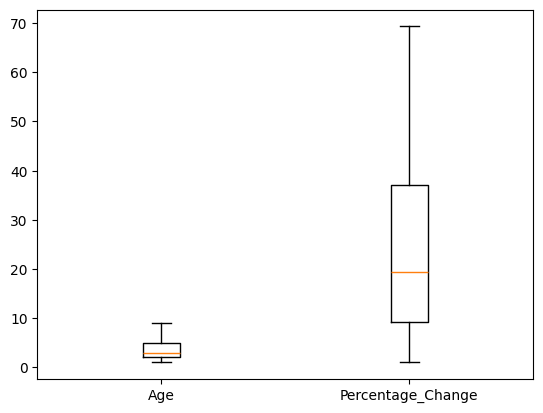

In [102]:
f_statistic, pvalue = stats.f_oneway(df["Age"],df['Percentage_Change'])
print(pvalue)
plt.figure()
plt.boxplot([df["Age"],df['Percentage_Change']], tick_labels=['Age', 'Percentage_Change'])
plt.show()


Conclusion: Based on our P-Value, the p-value is less than 0.5, so we reject the null hypothesis, so this means the age of the car affects the percentage change in the price of the car.

2. *Correlation* 

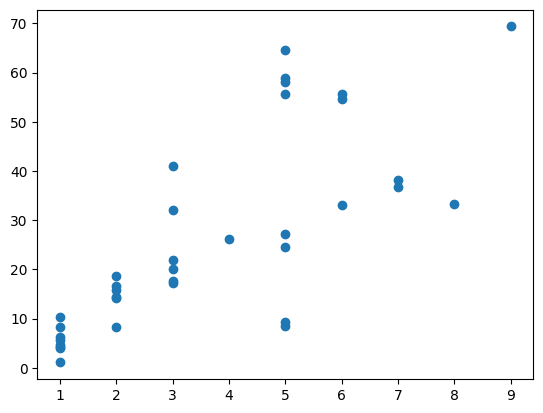

0.7572912992964311


In [103]:

correlation = df['Age'].corr(df["Percentage_Change"])
plt.scatter(df['Age'],df["Percentage_Change"])
plt.show()
print(correlation)


Conclusion: We looked into the correlation between age of the car and the change in percentage of cars，and we determined the correlation between the two sets of data and concluded, which is they have strong positive correlation. The correlation between two data is 0.7573, it mean the when the age of car change, the percentage change in car price will change in the same direction.

3. *Features* 

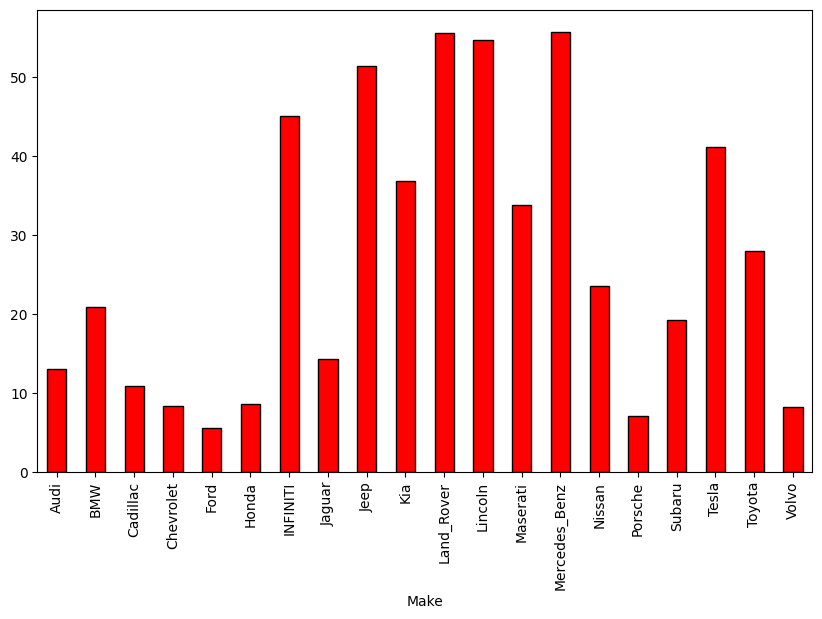

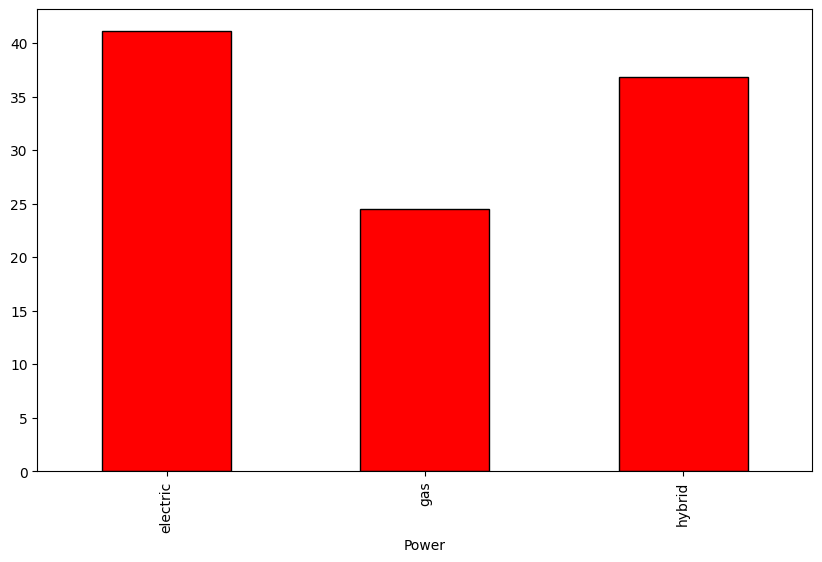

In [104]:
Percentage_Change_by_Make = df.groupby("Make")["Percentage_Change"].mean()
Power_by_Make = df.groupby("Power")["Percentage_Change"].mean()

plt.figure(figsize=(10, 6))
Percentage_Change_by_Make.plot(kind='bar', color='red', edgecolor='black')

plt.show()
plt.figure(figsize=(10, 6))
Power_by_Make.plot(kind='bar', color='red', edgecolor='black')

plt.show()


Conclusion: Form the bar plot, we can see the Mercedes_Benz are the most higher of avenger of the percentage change in car price and the Ford are most lowest. Also, the avenger of the percentage change in car prices are most between the 10% to 45%. The data mat have outliers could cause skew, beacsue the data is not large enough, but it still can prove the different the car make casue the percentafe change in the car prices. Then, electric and hybrid cars are price change are higher than gas car.

#### After check three different statistical methods, we can the age of car is most reason that effect the car prices. Also, the price changes of some car manufacturers seem to be greater than those of other car manufacturers and the gas cars have higher preservation rate. ####

**Primary analysis**

*Regression*

In [105]:
X = df[['Age']]
y = df['Percentage_Change']

model = LinearRegression()
model.fit(X, y)

intercept = model.intercept_
slope = model.coef_[0]
df['Predicted_Percentage_Change'] = model.predict(X)
mse = mean_squared_error(y, df['Predicted_Percentage_Change'])
r2 = r2_score(y, df['Predicted_Percentage_Change']) 
print("Mean Squared Error (MSE):", mse)
print("R2 Score:", r2)
print("Intercept:", intercept)
print("Slope:", slope)

Mean Squared Error (MSE): 162.39041349018783
R2 Score: 0.5734901119900769
Intercept: 1.6964392626437643
Slope: 6.677238065227669


The MSE represents the average squared difference between the actual values and the predicted values. A lower MSE indicates a better fit of the model.
In this case an MSE of 162.39, and it mean the squared errors of prediction are moderately high. For the r2 measures the proportion of variance in the dependent variable that can be explained by the independent variable. However, the r2 show that about 57.35% of the variation in Percentage Change is explained by Age.

**Visualization**

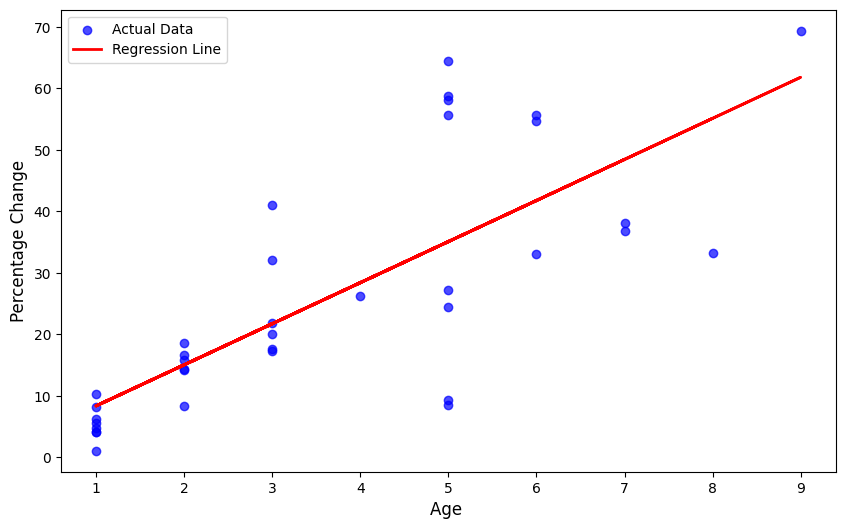

In [106]:
plt.figure(figsize=(10, 6))

plt.scatter(df['Age'], df['Percentage_Change'], color='b', label='Actual Data', alpha=0.7)
plt.plot(df['Age'], df['Predicted_Percentage_Change'], color='r', label='Regression Line', linewidth=2)
plt.xlabel('Age ', fontsize=12)
plt.ylabel('Percentage Change', fontsize=12)

plt.legend()

plt.show()

In the plot, As age increases, the percentage change also tends to rise, which mean older cars experience higher percentage changes in their value. The regression line (in red) represents the general trend in the data, highlighting a positive correlation between age and percentage change.

**Insights and Conclusions**

Cars typically lose value at a faster rate during their early years like 1–5 years old, which is a well-documented trend in automotive markets. This is evident in the dataset as the percentage change begins to rise with age. If you are a buyers, and want to purchase a car in lower price, they can Purchasing slightly older cars, such as 1–3 years old, may offer better value. While age is a dominant factor, other variables like car brand, condition, fuel type, and market trends likely interact with age to influence price changes. 